### 统计学：检验心理学现象

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

(1) 我们的自变量是什么？因变量是什么？

**自变量**是 文字条件，**因变量**是 完成阅读的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

在分析数据前，认为完成两个不同文字条件下的检测所需要的阅读时间是一致的。

**零假设**  H0 : μ0 ＝ μ1

即一致文字条件下，完成阅读所需的总体时间均值与不一致文字条件下，完成阅读所需的总体时间均值相同。

**备择假设**  H1 : μ0 ≠ μ1

即一致文字条件下，完成阅读所需的总体时间均值与不一致文字条件下，完成阅读所需的总体时间均值不相同。

其中

μ0：代表在一致文字条件下，完成阅读所需的总体时间均值。

μ1：代表在不一致文字条件下，完成阅读所需的总体时间均值。

由于总体的均值和标准差都是是未知的，样本较小，而且样本数据为同一元素在不同测试条件下的检测结果，因此选用 **配对T检验**

根据假设集，本检验为双尾检验，α值取0.05

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [23]:
# 导入库和数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('stroopdata.csv')

In [24]:
#预览数据集
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [25]:
# 查看数据维度
data.shape

(24, 2)

In [26]:
# 查看数据类型
data.dtypes

Congruent      float64
Incongruent    float64
dtype: object

In [27]:
#查看数据的统计信息
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


集中趋势测量：

一致文字条件 完成时间均值为 14.051125 s

不一致文字条件 完成时间均值 22.015917 s

变异测量：

一致文字条件 完成时间的标准差为 3.559358 s

不一致文字条件 完成时间的标准差为 4.797057 s

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

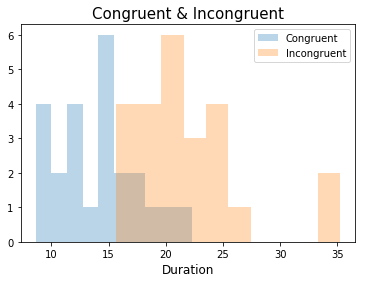

In [28]:
#建立条形图对比时长分布数据
plt.hist(data.Congruent , alpha = 0.3, label = 'Congruent')
plt.hist(data.Incongruent , alpha = 0.3, label = 'Incongruent')
plt.title('Congruent & Incongruent',fontsize = 15)
plt.xlabel('Duration',fontsize = 12)
plt.legend()

由图中可以看出，文字不一致条件下的阅读时间分布，整体上高于文字一致条件下的阅读时间分布。

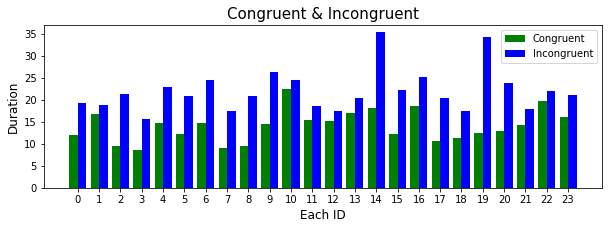

In [29]:
#建立柱状图对比时长分布数据
plt.subplots(figsize = (10,3))#设置画布大小
width = 0.4#设置条柱宽度
plt.bar(data.index , data.Congruent , width , color = 'g', label = 'Congruent')
plt.bar(data.index + width , data.Incongruent , width , color = 'b' , label = 'Incongruent')
plt.title('Congruent & Incongruent',fontsize = 15)
plt.xlabel('Each ID',fontsize = 12)
plt.ylabel('Duration',fontsize = 12)
locations = data.index + width / 2  # x 坐标刻度位置
plt.xticks(locations, data.index)
plt.legend()

由图中可以看出，文字不一致条件下每个测试的阅读完成时间都高于文字一致条件下的阅读时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

### 一，利用抽样分布计算 P值

In [30]:
# 计算样本中两组数据的均值差
diff_sample = data['Congruent'].mean() - data['Incongruent'].mean()
diff_sample

-7.964791666666665

In [31]:
#用 拔靴法 对样本数据进行抽样，计算两组数据的均值差。
diffs = [] #初始化差值列表
for _ in range(10000):
    bootsamp = data.sample(200, replace = True)
    con_mean = bootsamp['Congruent'].mean()
    incon_mean = bootsamp['Incongruent'].mean()
    # 填充初始化序列
    diffs.append(con_mean - incon_mean)  
np.std(diffs) # 均差的标准方差

0.33391843350118006

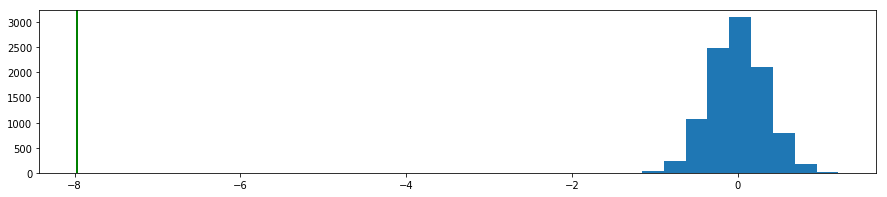

In [32]:
#利用均值差的抽样分布来模拟零假设
null_vals = np.random.normal(0, np.std(diffs), 10000)
#可视化模拟的抽样分布
plt.subplots(figsize = (15,3))#设置画布大小
plt.hist(null_vals)
#将样本的均差绘制在该抽样分布的条形图中
plt.axvline(x = diff_sample , color = 'g' , linewidth = 2)

In [33]:
#计算本次双尾检验的P值
null_mean = 0
p_val = (null_vals < diff_sample).mean() + (null_vals > null_mean + (null_mean - diff_sample )).mean()
p_val

0.0

由抽样分布计算得到的 P值 为0.0

根据当前数据及假设数据集，所计算的 p值 为 0.0，远小于 α/2 ，证明该结果具有统计显著性。

### 二，利用统计检验

In [34]:
#计算样本中差异的标准偏差
diff_std = (data.Congruent - data.Incongruent).std()
diff_std

4.864826910359056

In [35]:
#计算样本中差异的标准误差
diff_error = diff_std / np.sqrt(data.shape[0])
diff_error

0.99302863477834058

In [36]:
#计算检验统计量
t_stat = diff_sample / diff_error
t_stat

-8.0207069441099552

本次检验为置信水平为 95% 的双侧检验,在自由度 n=23 的情况下，查T-table得到t的临界值为：± 2.069

样本中均值差异的统计值为：-7.9648

差异标准偏差为: 4.8648

标准误差: 0.993

检验统计值: 8.0207

可以看出，检验统计值 > 临界值

查询T-table得到P值是小于0.05的

证明处于临界区内，该结果具有统计显著性。

所以根据目前数据集，我们将拒绝零假设。

### 结论：

根据假设检验结果，认为在一致文字条件和不一致文字条件下，参与者完成阅读所需要的的时间是不一致的。